In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
xr.show_versions()

c:\Users\bruij_kn\AppData\Local\mambaforge\envs\thesis\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "



INSTALLED VERSIONS
------------------
commit: None
python: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: ('Dutch_Netherlands', '1252')
libhdf5: 1.14.3
libnetcdf: 4.9.2

xarray: 2024.3.0
pandas: 2.2.2
numpy: 1.26.4
scipy: 1.13.0
netCDF4: 1.6.5
pydap: None
h5netcdf: 1.3.0
h5py: 3.11.0
Nio: None
zarr: None
cftime: 1.6.3
nc_time_axis: None
iris: None
bottleneck: 1.3.8
dask: 2024.4.2
distributed: 2024.4.2
matplotlib: 3.8.4
cartopy: None
seaborn: None
numbagg: None
fsspec: 2024.3.1
cupy: None
pint: None
sparse: None
flox: None
numpy_groupies: None
setuptools: 69.5.1
pip: 24.0
conda: None
pytest: 8.1.1
mypy: None
IPython: 8.22.2
sphinx: None


In [4]:
folder = "./raw_datasets/era5/"

dir_list = [
    # "10m_u_component_of_wind",
    # "10m_v_component_of_wind",
    "2m_temperature",
    # "mean_surface_latent_heat_flux",
    # "mean_surface_net_long_wave_radiation_flux",
    # "mean_surface_net_short_wave_radiation_flux",
    # "sea_ice_cover",
    # "sea_surface_temperature",
    # "snow_depth",
    # "soil_temperature_level_1",
    # "soil_temperature_level_2",
    # "soil_temperature_level_3",
    # "soil_temperature_level_4",
    # "soil_temperature_level_1_offs",
    # "soil_temperature_level_2_offs",
    # "soil_temperature_level_3_offs",
    # "soil_temperature_level_4_offs",
]


for dir in dir_list:

    fp = os.path.join(folder, f"{dir}/{dir}_2020.nc")

    ds = xr.open_dataset(fp)

    print("Longitude \t min: ", np.min(ds.longitude.values), "\t max: ", np.max(ds.longitude.values))
    print("Latitude \t min: ", np.min(ds.latitude.values), "\t max: ", np.max(ds.latitude.values))
    print()

Longitude 	 min:  205.0 	 max:  210.0
Latitude 	 min:  69.0 	 max:  72.0



In [ ]:
min_time = pd.to_datetime('2020-07-06')
max_time = pd.to_datetime('2020-07-08')

mask = (ds.time>min_time) * (ds.time<max_time)

ds_sample = ds.where((ds.time > min_time) & (ds.time < max_time) & (ds.longitude == 190.0) & (ds.latitude==70.5), drop=True)

print(ds_sample)

['2020-07-05T17' '2020-07-05T18' '2020-07-05T19' '2020-07-05T20'
 '2020-07-05T21' '2020-07-05T22' '2020-07-05T23' '2020-07-06T00'
 '2020-07-06T01' '2020-07-06T02' '2020-07-06T03' '2020-07-06T04'
 '2020-07-06T05' '2020-07-06T06' '2020-07-06T07' '2020-07-06T08'
 '2020-07-06T09' '2020-07-06T10' '2020-07-06T11' '2020-07-06T12'
 '2020-07-06T13' '2020-07-06T14' '2020-07-06T15' '2020-07-06T16'
 '2020-07-06T17' '2020-07-06T18' '2020-07-06T19' '2020-07-06T20'
 '2020-07-06T21' '2020-07-06T22' '2020-07-06T23' '2020-07-07T00'
 '2020-07-07T01' '2020-07-07T02' '2020-07-07T03' '2020-07-07T04'
 '2020-07-07T05' '2020-07-07T06' '2020-07-07T07' '2020-07-07T08'
 '2020-07-07T09' '2020-07-07T10' '2020-07-07T11' '2020-07-07T12'
 '2020-07-07T13' '2020-07-07T14' '2020-07-07T15']


''

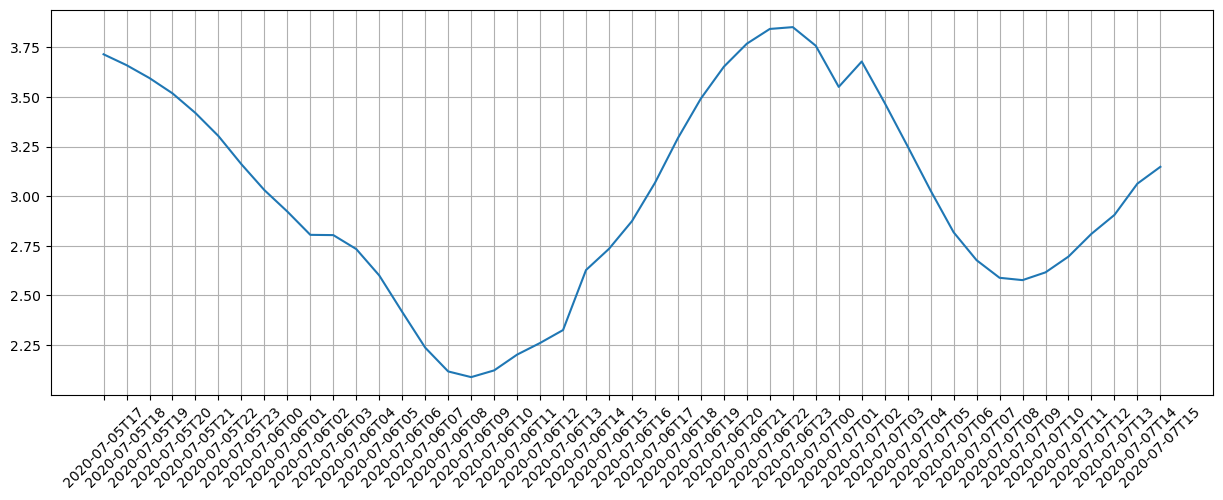

In [36]:
time_array = ds_sample.time.values

time_of_day = (time_array.astype('datetime64[h]') - 8) #- time_array.astype('datetime64[D]')

print(time_of_day)

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ds_sample.time.values, ds_sample.t2m.values.flatten()-273.15)

plt.xticks(ds_sample.time.values, time_of_day, rotation=45)

ax.grid()

;

In [38]:
longitude_Barter_Island = 360 + -143.75
latitude_Barter_Island = 70.0

spatial_mask = (ds.longitude == longitude_Barter_Island) * (ds.latitude == latitude_Barter_Island)

new_ds = ds.where(spatial_mask, drop=True)

In [39]:
new_ds

<xarray.Dataset> Size: 141kB
Dimensions:    (time: 8784, latitude: 1, longitude: 1)
Coordinates:
  * longitude  (longitude) float32 4B 216.2
  * latitude   (latitude) float32 4B 70.0
  * time       (time) datetime64[ns] 70kB 2020-01-01 ... 2020-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float64 70kB 249.9 250.1 ... 244.0
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-16 23:19:49 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [47]:
t_start = pd.to_datetime('2020-05-25')
t_end = pd.to_datetime('2020-06-05')

temporal_mask = (ds.time >= t_start) * (ds.time < t_end)

new_ds2 = new_ds.where(temporal_mask, drop=True)

print(new_ds2.time.values)

['2020-05-25T00:00:00.000000000' '2020-05-25T01:00:00.000000000'
 '2020-05-25T02:00:00.000000000' '2020-05-25T03:00:00.000000000'
 '2020-05-25T04:00:00.000000000' '2020-05-25T05:00:00.000000000'
 '2020-05-25T06:00:00.000000000' '2020-05-25T07:00:00.000000000'
 '2020-05-25T08:00:00.000000000' '2020-05-25T09:00:00.000000000'
 '2020-05-25T10:00:00.000000000' '2020-05-25T11:00:00.000000000'
 '2020-05-25T12:00:00.000000000' '2020-05-25T13:00:00.000000000'
 '2020-05-25T14:00:00.000000000' '2020-05-25T15:00:00.000000000'
 '2020-05-25T16:00:00.000000000' '2020-05-25T17:00:00.000000000'
 '2020-05-25T18:00:00.000000000' '2020-05-25T19:00:00.000000000'
 '2020-05-25T20:00:00.000000000' '2020-05-25T21:00:00.000000000'
 '2020-05-25T22:00:00.000000000' '2020-05-25T23:00:00.000000000'
 '2020-05-26T00:00:00.000000000' '2020-05-26T01:00:00.000000000'
 '2020-05-26T02:00:00.000000000' '2020-05-26T03:00:00.000000000'
 '2020-05-26T04:00:00.000000000' '2020-05-26T05:00:00.000000000'
 '2020-05-26T06:00:00.000

In [48]:
print(len(new_ds2.t2m.values))
print(11*24)

264
264


In [ ]:
ds.close()